# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [120]:
# import numpy and pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr, beta
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.proportion import proportions_ztest

from scipy.stats import ttest_ind, norm, t, ttest_1samp
from scipy.stats import f_oneway
from scipy.stats import sem

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [2]:
# Run this code:
salaries = pd.read_csv('../data/Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [3]:
# Your code here

# Display the top5 rows of the DataFrame
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


In [4]:
salaries.shape

(33183, 8)

In [5]:
# Descriptive statistics
salaries.describe().round(2)

,Typical Hours,Annual Salary,Hourly Rate
count,8022.00,25161.00,8022.00
mean,34.51,86787.00,32.79
std,9.25,21041.35,12.11
min,10.00,7200.00,2.65
25%,20.00,76266.00,21.20
50%,40.00,90024.00,35.60
75%,40.00,96060.00,40.20
max,40.00,300000.00,109.00


In [6]:
# Check the missing values
missing_values = salaries.isnull().sum()
missing_values

Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25161
Annual Salary         8022
Hourly Rate          25161
dtype: int64

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

Define hypotheses

**Null hypothesis(H₀)**: μ = 30
The population mean hourly wage is equal to $30 per hour.

**Alternative hypothesis(H₁)**: μ ≠ 30 (two-sided)
The population mean hourly wage is different from $30 per hour.

**Confidence interval** = 95%

**Significance level(alpha)** = 0.05

In [7]:
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


In [8]:
# Create a separate Dataframe for "hourly wage"
salaries_hourly_rate_df = salaries['Hourly Rate'].reset_index(drop= True, name='hourly_rate')
print("Original shape:", salaries_hourly_rate_df.shape[0])

# Count missing values
print("Missing count:", salaries_hourly_rate_df.isna().sum())

# Drop NaN values from the DataFrame
salaries_hourly_rate_df.dropna(inplace= True)

# Reset index cleanly after drop NaN
# salaries_hourly_rate_df.drop(columns='index', inplace=True)
salaries_hourly_rate_df.reset_index(drop= True, inplace= True)

print("Shape after drop NaN values:", salaries_hourly_rate_df.shape[0])

Original shape: 33183
Missing count: 25161
Shape after drop NaN values: 8022


In [9]:
salaries_hourly_rate_df

0       19.86
1       46.10
2       35.60
3        2.65
4       17.68
        ...  
8017    46.10
8018    17.68
8019    35.60
8020    46.35
8021    48.85
Name: Hourly Rate, Length: 8022, dtype: float64

In [10]:
type(salaries_hourly_rate_df)

pandas.core.series.Series

In [11]:
salaries_hourly_rate_df.head()

0    19.86
1    46.10
2    35.60
3     2.65
4    17.68
Name: Hourly Rate, dtype: float64

In [12]:
salaries[salaries['Salary or Hourly']=='Hourly'][['Hourly Rate']].value_counts().sum()

np.int64(8022)

- This is to confirms that the NaN values which are dropped are the only values based on the hourly salary. This we can confirms with ``Salary or Hourly`` column.

In [13]:
salaries['Hourly Rate'].describe()

count    8022.000000
mean       32.788558
std        12.112573
min         2.650000
25%        21.200000
50%        35.600000
75%        40.200000
max       109.000000
Name: Hourly Rate, dtype: float64

- Average mean value of the population sample is 32.78. This means that hourly salary of the population is $32.78.

### Plot Frequnecy & Probability Distribution (Population)

In [18]:
salaries['Hourly Rate']

0          NaN
1          NaN
2          NaN
3          NaN
4        19.86
         ...  
33178      NaN
33179      NaN
33180      NaN
33181      NaN
33182      NaN
Name: Hourly Rate, Length: 33183, dtype: float64

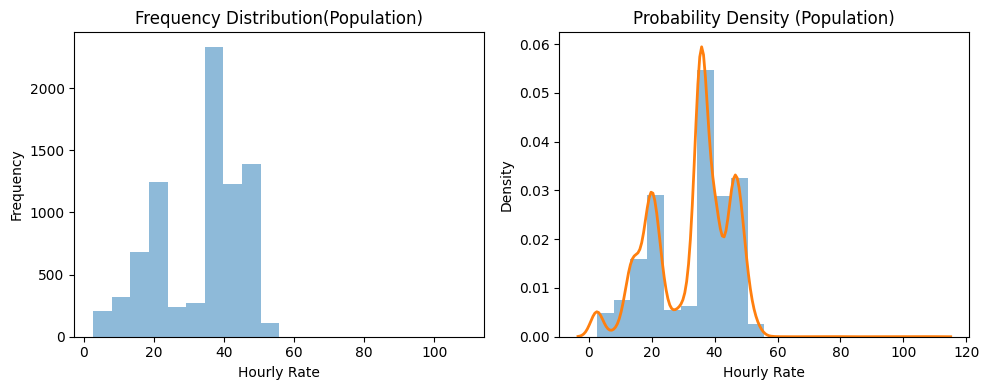

In [35]:
plt.figure(figsize= (10, 4))
# ---> Frequency Distribution
plt.subplot(1, 2, 1)
plt.hist(salaries['Hourly Rate'], bins=20, alpha = 0.5)
plt.xlabel("Hourly Rate")
plt.ylabel("Frequency")
plt.title("Frequency Distribution(Population)")

# ---> Probability Distribution
plt.subplot(1, 2, 2)
plt.hist(salaries['Hourly Rate'], bins=20, density=True, alpha = 0.5)
sns.kdeplot(salaries['Hourly Rate'], linewidth = 2)
plt.xlabel("Hourly Rate")
plt.ylabel("Density")
plt.title("Probability Density (Population)")

plt.tight_layout()
plt.show()

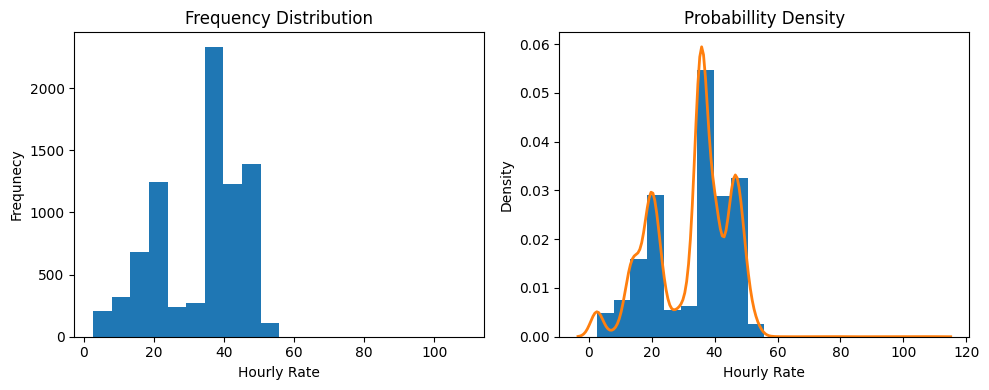

In [36]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

#---> Frequency Distribution
ax[0].hist(salaries_hourly_rate_df, bins= 20)
ax[0].set_xlabel("Hourly Rate")
ax[0].set_ylabel("Frequnecy")
# plt.yscale('log')
ax[0].set_title("Frequency Distribution")

#---> Probability Distribution
ax[1].hist(salaries_hourly_rate_df, bins= 20, density= True)
sns.kdeplot(salaries['Hourly Rate'], linewidth = 2)
ax[1].set_xlabel("Hourly Rate")
ax[1].set_ylabel("Density")
ax[1].set_title("Probabillity Density")
plt.tight_layout()
plt.show()

- Missing values (NaN) do not affect the charts differently. Both the frequency chart and the probability chart handle missing data in the same way.

- The data does not follow a simple or common pattern like a normal (bell-shaped), uniform, or exponential distribution.

- Instead of one clear peak, the data shows several peaks, which means the values are clustered in different groups.

- The hourly rates are spread across multiple ranges, not concentrated around one typical value.

- Because of this, it is hard to make strong or final conclusions using standard assumptions, and the data likely comes from different groups or sources.

### Sampling & Central Limit Theorem

In [55]:
sample_list = []
for i in range(1000):
    s = salaries_hourly_rate_df['Hourly Rate'].sample(300)
    s_mean= s.mean().round(2)
    sample_list.append(s_mean)

sample_list

sample_mean_df = pd.DataFrame(sample_list, columns= ['s_mean'])
sample_mean_df.reset_index()
sample_mean_df.head()

,s_mean
0,32.66
1,32.63
2,33.27
3,33.09
4,33.12


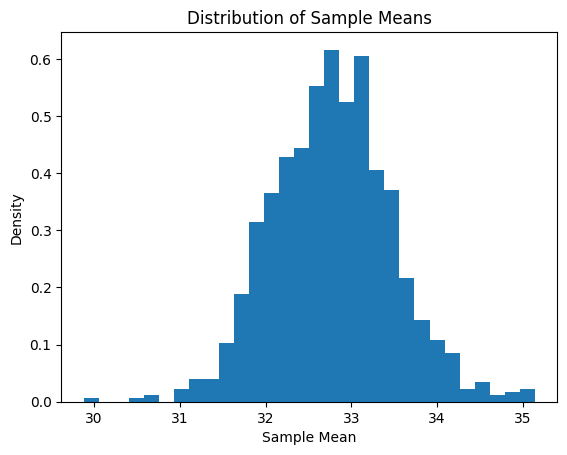

In [59]:
plt.hist(sample_mean_df['s_mean'], bins=30, density=True)
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.title("Distribution of Sample Means")
plt.show()

In [50]:
sample_mean_df.describe()

,mean
count,1000.000000
mean,32.786220
std,0.672839
min,30.800000
25%,32.320000
50%,32.800000
75%,33.252500
max,35.240000


In [67]:
sample_mean_df.sample(10)

,s_mean
383,32.95
440,32.54
889,33.02
400,32.14
897,31.86
472,32.52
774,32.46
968,32.37
776,32.74
866,32.40


In [80]:
sample_mean_df.iloc[1]

s_mean    32.63
Name: 1, dtype: float64

In [24]:
# Crete a sample of 200 from the DataFrame
salaries_sample_1 = salaries_hourly_rate_df['Hourly Rate'].sample(300)
salaries_sample_1.shape[0]

300

In [114]:
salaries_sample_1.describe()

count    300.000000
mean      33.016600
std       12.077999
min        2.650000
25%       21.430000
50%       35.600000
75%       40.800000
max       53.100000
Name: Hourly Rate, dtype: float64

In [115]:
# Your code here

#--> HYPOTHESIS TESTING

# One-sample two-sided t-test
_, p_value = ttest_1samp(salaries_sample_1, 30, alternative="two-sided")

# Sample mean
sample_mean = salaries_sample_1.mean()
print(f"Sample mean: {sample_mean:.2f}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject H0: The mean hourly wage is significantly different from $30/hr.")
else:
    print("Fail to reject H0: No significant difference from $30/hr.")

Sample mean: 33.02
P-value: 2.0724476149418484e-05
Reject H0: The mean hourly wage is significantly different from $30/hr.


- Since the p-value is less than 0.05, we reject the null hypothesis and conclude that the mean hourly wage is statistically significantly different from $30 per hour.

# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [116]:
salaries_hourly_rate_df

,Hourly Rate
0,19.86
1,46.10
2,35.60
3,2.65
4,17.68
...,...
8017,46.10
8018,17.68
8019,35.60
8020,46.35


In [ ]:
# Your code here

confidence_level = 0.95
n = len(salaries_hourly_rate_df)
df = n - 1
sample_mean = salaries_hourly_rate_df['Hourly Rate'].mean()
standard_error = sem(salaries_hourly_rate_df)

# Construct confidence interval
ci_lower, ci_upper = t.interval(
    confidence= 0.95,
    df = df,
    loc = sample_mean,
    scale = standard_error
)
print(f"Sample mean: {sample_mean:.2f}")
print(f"95% Confidence Interval: ({ci_lower.item():.2f}, {ci_upper.item():.2f})")

Sample mean: 32.79
95% Confidence Interval: (32.52, 33.05)


# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

We want to test whether the proportion of hourly workers in Chicago is different from 25%.

Null hypothesis (H₀): p(proportions) = 0.25 

Alternative hypothesis (H₁): p ≠ 0.25

Confidence level: 95% (α = 0.05)

This is a two-sided one-proportion z-test.

In [154]:
# Your code here

# Calculute parameters needed for proportion z-test
hourly_workers = salaries_hourly_rate_df['Hourly Rate'].value_counts().sum()
total_workers = salaries.shape[0]

# Proportions Z-Test
z_stat, p_val = proportions_ztest(
    count=hourly_workers,
    nobs=total_workers,
    value=0.24,
    alternative='two-sided'
)

print(f"z-statistic: {z_stat:.3f}")
print(f"p-value: {p_val:.4f}")

alpha = 0.05

if p_val < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

z-statistic: 0.745
p-value: 0.4565
Fail to reject the null hypothesis.


- We reject the null hypothesis and conclude that the proportion of hourly workers in the City of Chicago is significantly different from 25%.

In [153]:
hourly_workers/total_workers*100

np.float64(24.17502938251514)

In [155]:
from statsmodels.stats.proportion import proportion_confint

# 95% confidence interval
lower, upper = proportion_confint(
    count=hourly_workers,
    nobs=total_workers,
    alpha=0.05,       # 95% CI
    method='normal'   # z-based CI
)

print(f"95% Confidence Interval: ({lower:.3f}, {upper:.3f})")

95% Confidence Interval: (0.237, 0.246)
